# Credit Card Fraud Detection

# Random Forest and Logistics Regression 

# 1 Introduction

In this document, we will compare the performance of the Random Forest classifier and the Logistics Regression classifier analyzing a dataset composed of banking card transactions classsified as fraud or normal (non fraud). The dataset is part of Kaggle's competitions, and it is available in the following link: 

[creditcard.csv](https://www.kaggle.com/mlg-ulb/creditcardfraud/data#creditcard.csv)

## 2 Import Necessary Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

from pylab import rcParams
from collections import Counter

#set up graphic style in this case I am using the color scheme from xkcd.com
rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
LABELS = ["Normal","Fraud"]
#col_list = ["cerulean","scarlet"]# https://xkcd.com/color/rgb/
#sns.set(style='white', font_scale=1.75, palette=sns.xkcd_palette(col_list))

%matplotlib inline

## 3 Explore the data 

In [3]:
#load the dataset
df = pd.read_csv("creditcard.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Explanation of the columns:
* Time => Number of seconds elapsed between this transaction and the first transaction in the dataset
* V1 - V28 => Result of a PCA Dimensionality reduction to protect user identities and sensitive features 
* Amount => Transaction amount
* Class => 1 for fraudulent transactions, 0 otherwise

In [4]:
#check the shape of the dataset
df.shape

(284807, 31)

In [5]:
#check for unbalanced values
df.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

In [ ]:
#normal_df = df[df.Class == 0] #normal records 
#fraud_df = df[df.Class == 1] #fraud records

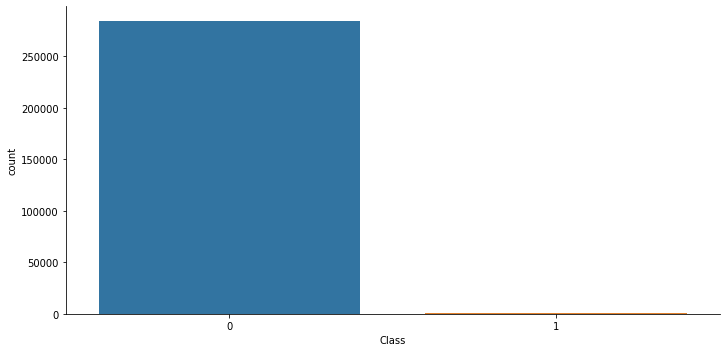

In [20]:
#visualization of the Class data
sb.factorplot('Class',data=df,kind="count", aspect=2)

Comments => We can see that there is an UNBALANCED number of labels with 1 and 0. So, we will take this into account when we will build the model.

## 4 Prediction and Evaluation 

### 4.1 Response and Feature Variables 

Firstly, separate the dataset into response variables (data to analyze) and feature variables (the target to achieve).

In [6]:
X = df.drop('Class', axis = 1)   # X variable = store the data
y = df['Class']    # y variable = store the classes/targets

In [8]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

### 4.2 Training and Test Split 

Secondly, split the data into training set and testing set, using the package train_test_split 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [10]:
X_train.shape

(199364, 30)

In [11]:
X_test.shape

(85443, 30)

### 4.3 Logistic Regression Classifier 

Let's review the performance of the Logistic Regression classifier predicting the class (fraud or non fraud) of the credict transactions.

In [13]:
#create a function to adjust the unbalanced values
def run_model_balanced(X_train, X_test, y_train, y_test):
    #Set up the Logistic Regression algorithm
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    #build the model on training data
    clf.fit(X_train, y_train) 
    return clf

model = run_model_balanced(X_train, X_test, y_train, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iteration

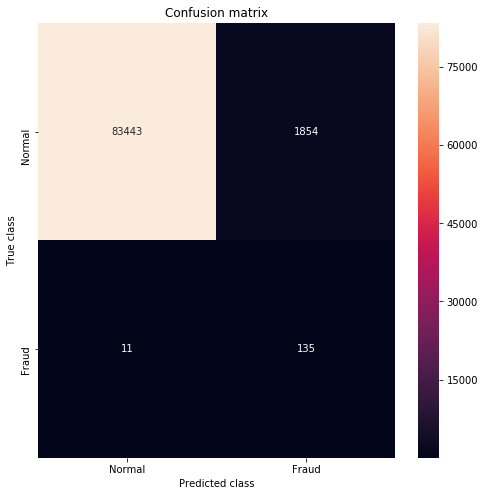

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85297
           1       0.07      0.92      0.13       146

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.56     85443
weighted avg       1.00      0.98      0.99     85443



In [14]:
#Predict the values of test group
pred_y = model.predict(X_test)

#create a function to visualize the results
def show_results(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

#Visualize the results
show_results(y_test, pred_y)

Comments => The matrix indicates that there are 83.443 real possitive values and 135 real negative values (data that was 0 and 1 and the model has predicted them as such).

On another hand, there were 11 records in total related to false negative data, it means that real data that were 1 but the model predicted them as 0. Regarding the postive negative data, the model has categorized a total of 1854 records under this cluster (there were 0 and the model predicted it as 1). Therefore, as the total number of false positives is really high, we cannot conclude that this classifier can predict new values with a good accuray.

### 4.4 Random Forest Classifier 

Let's review the performance of the Random Forest classifier predicting the class (fraud or non fraud) of the credict transactions.

In [23]:
from sklearn.ensemble import RandomForestClassifier

#Set up the Random Forest Classifier with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,verbose=2,
                               max_features = 'sqrt')

#build the model on training data
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.6min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=2, warm_start=False)

In [26]:
#Other fasterRandom Forest Classifier:
#speed_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", max_features = 'sqrt', verbose=2, max_depth=6, oob_score=True, random_state=50)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


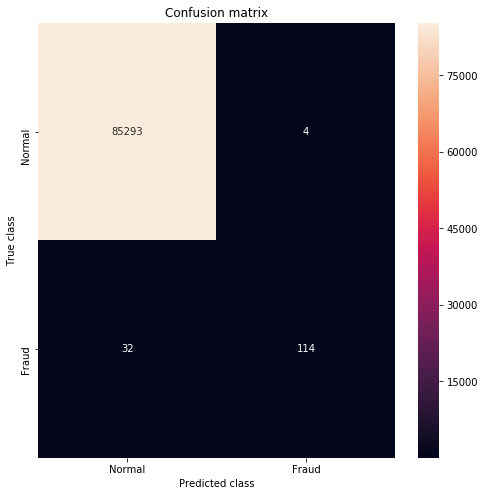

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85297
           1       0.97      0.78      0.86       146

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [25]:
#Predict the values of test group
pred_y = model.predict(X_test)

#Visualize the results
show_results(y_test, pred_y)

Comments => The matrix indicates that there are 85.293 real possitive values and 114 real negative values (data that was 0 and 1 and the model has predicted them as such).

On another hand, there were 32 records in total related to false negative data, it means that real data that were 1 but the model predicted them as 0. Regarding the postive negative data, only 4 records have been categorized under this cluster (there were 0 and the model predicted it as 1), so the result is very good.

Now, let's calculate all the metrics to review the Random Forest classification model individually.

In [28]:
from sklearn.metrics import precision_score
#Compute the precission of the model precisión del modelo
precision = precision_score(y_test, pred_y)
print(precision)

0.9661016949152542


In [30]:
from sklearn.metrics import accuracy_score
#check the model accuracy
accuracy = accuracy_score(y_test, pred_y)
print(accuracy)

0.9995786664794073


In [32]:
from sklearn.metrics import recall_score
#check sensitivity/recall of the model
sensibility = recall_score(y_test, pred_y)
print(sensibility)

0.7808219178082192


In [33]:
from sklearn.metrics import f1_score
#Check the F1-score (a combination between precision and sensibility)
f1_score = f1_score(y_test, pred_y)
print(f1_score)

0.8636363636363635


In [34]:
from sklearn.metrics import roc_auc_score
#Check the ROC-AUC curve of the model
roc_auc = roc_auc_score(y_test, pred_y)
print(roc_auc)

0.8903875114206109


Conclussion => The Random Forest classifier has brought better results than the Logistic Regression classifier in the prediction of the class, providing an accuracy of 99%, which is a really possitive result.